<a href="https://colab.research.google.com/github/CristobalSVM/Datos_Masivos/blob/main/Practica_1_Paralelismo_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1: Paralelizacion.

Parte 1: Investigar sobre las lazy variables y como se usa el Delay para problemas mas grandes.


Las lazy variables o variables con retardo, tienen toda la información para ejecutar la lógica de la función a utilizar o utilizada y se puede visualizar el gráfico gracias a la librería dask.

\\

El **Delay** se puede utilizar en problemas más grandes por ejemplo, paralelizando una serie de funciones en un ciclo for.

\\

En el caso de que los conjuntos de datos sean demasiado grandes, se puede hacer uso de **dask.dataframe**, es un gran datadrame paralelo compuesto por muchos datadrames más pequeños en Pandas, divididos a lo largo del índice. 

\\

Dicho de otra forma, un Dask dataframe se compone de muchos Pandas dataframes en memoria separados junto con el índice.


Parte 2: Generen varias funciones y construyan un grafo de paralelización con al menos 4 cuellos de botella.

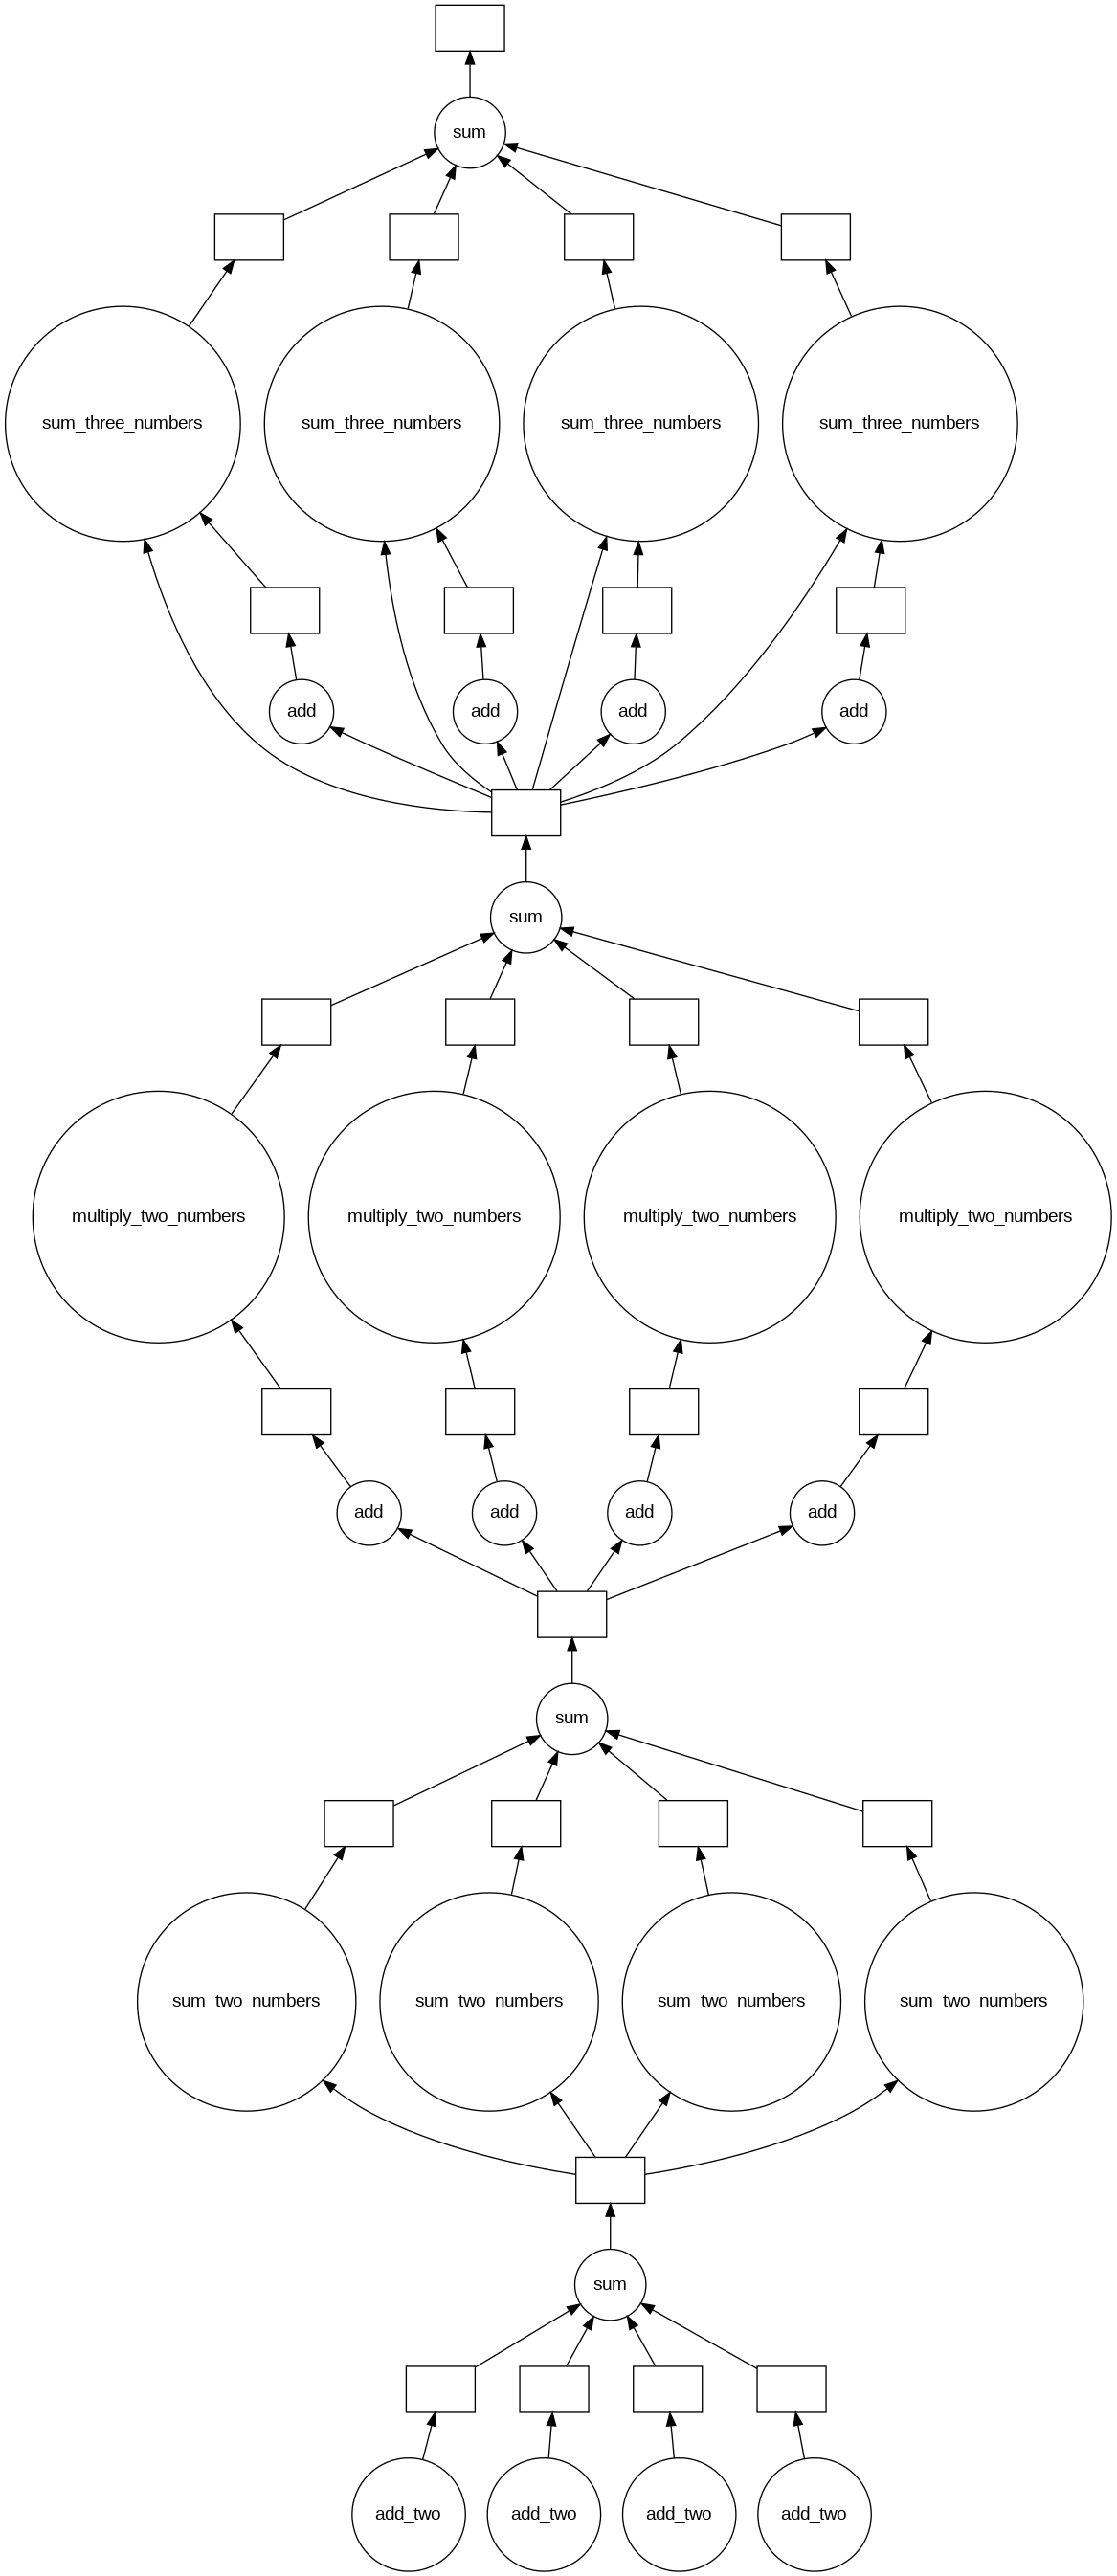

In [43]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar
import time

# Funciones para realizar operaciones matemáticas
import dask

@dask.delayed

#Add two function: Le suma 2 al valor inicial
def add_two(x):
  return x + 2

#sum two numbers: Similar a add, sumamos dos valores iniciales
def sum_two_numbers(x,y):
  return x + y

#Multiply four: El valor se multiplica por 4
def multiply_four(x):
  return x * 4

#Multiply two numbers: multiplicar dos valores
def multiply_two_numbers(x,y):
  return x*y

#Sum three numbers
def sum_three_numbers(x,y,z):
  return x+y+z

#Dummy dataframe
data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
data3 = [delayed(multiply_two_numbers)(k,total2+k) for k in data]
total3 = delayed(sum)(data3)
data4 = [delayed(sum_three_numbers)(k,total3,total3+k) for k in data]
total4 = delayed(sum)(data4)
total4.visualize()

In [44]:
total4.compute()

30752


Extra challenge: Buscar ensemble learning en Scikit learn, utilizar minimo 3 algoritmos de machine learning para crear un modelo paralelo basado en un ensamble. Generar uno con dask y otro con la libreria de ensemble de sklearn, y comparar resultados. 